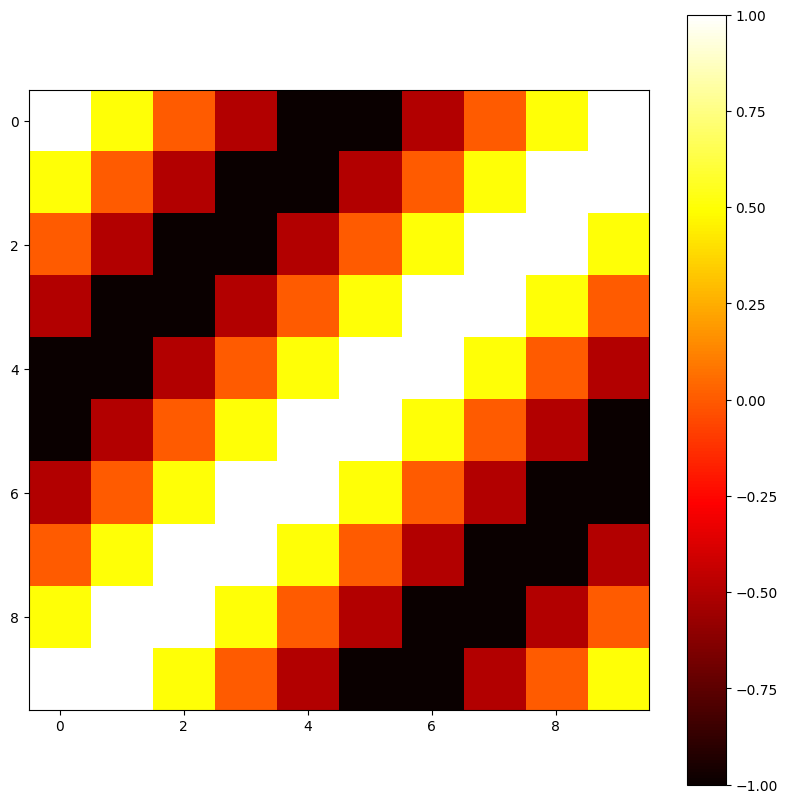

In [1]:
import numpy as np

def matriz_regresion(n_filas):
    vector_base = np.array([1,0.5,0,-0.5,-1,-1,-0.5,0,0.5,1])
    matriz = np.zeros((n_filas, vector_base.size))
    for i in range(n_filas):
        matriz[i] = np.roll(vector_base, -i)
    return matriz
def mostrar_matriz_heat_map(matriz):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.imshow(matriz, cmap='hot')
    plt.colorbar()
    plt.show()
m = matriz_regresion(10)
cov = np.cov(m)
mostrar_matriz_heat_map(m)

## Normalizacion
Debe normalizacion global pero cual?

- Análisis Frecuencia
La mayor información se concentra en la frecuencia de mayor tension(potencia)

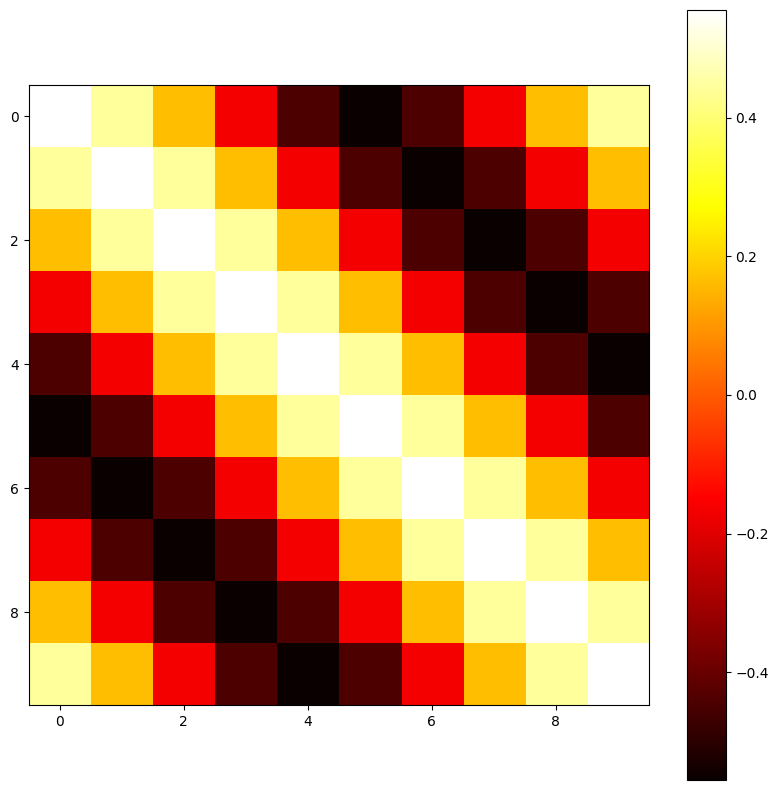

In [2]:
mostrar_matriz_heat_map(cov)

- Minimos cuadrados
- Fuse C Means
- Theta a traves del gradiente

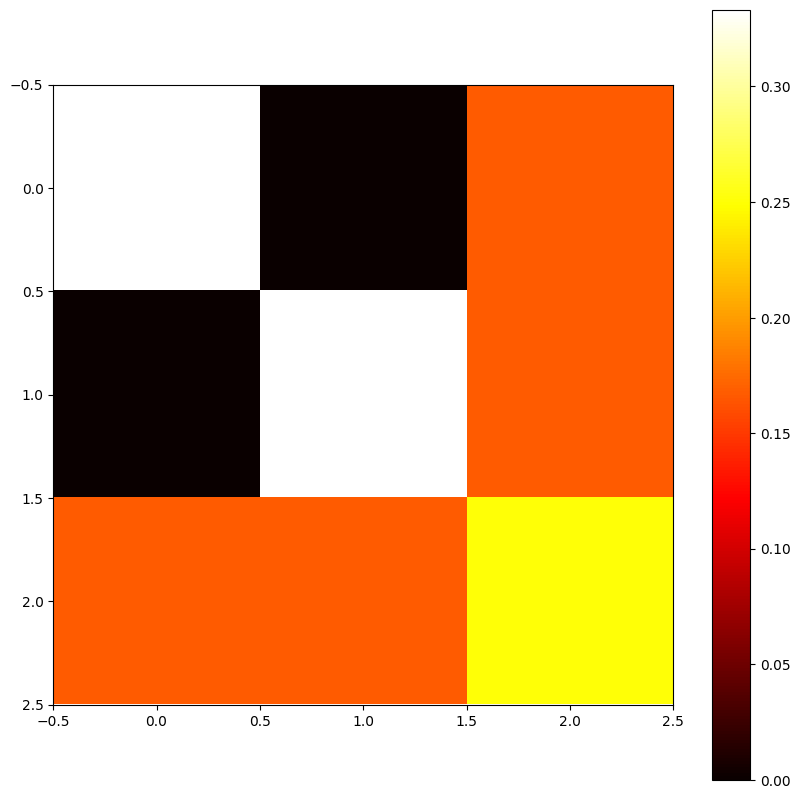

In [3]:
# Exp 1
M = [
    [1,0,0],
    [0,1,0],
    [0,0,0],
    [1,1,1],
]
M = np.array(M)
mostrar_matriz_heat_map(np.cov(M.T))

In [4]:
# caso cantinuo Exp 2
entrada_1 = np.arange(0.1, 1+0.1, 0.1)
entrada_2 = np.arange(0.1, 1+0.1, 0.1)
combinaciones = np.array(np.meshgrid(entrada_1, entrada_2)).T.reshape(-1,2)
salida = np.where((combinaciones[:, 0] >= 0.6) & (combinaciones[:, 1] >= 0.6), 1, 0)
matriz_combinada = np.hstack((combinaciones, salida.reshape(-1, 1)))

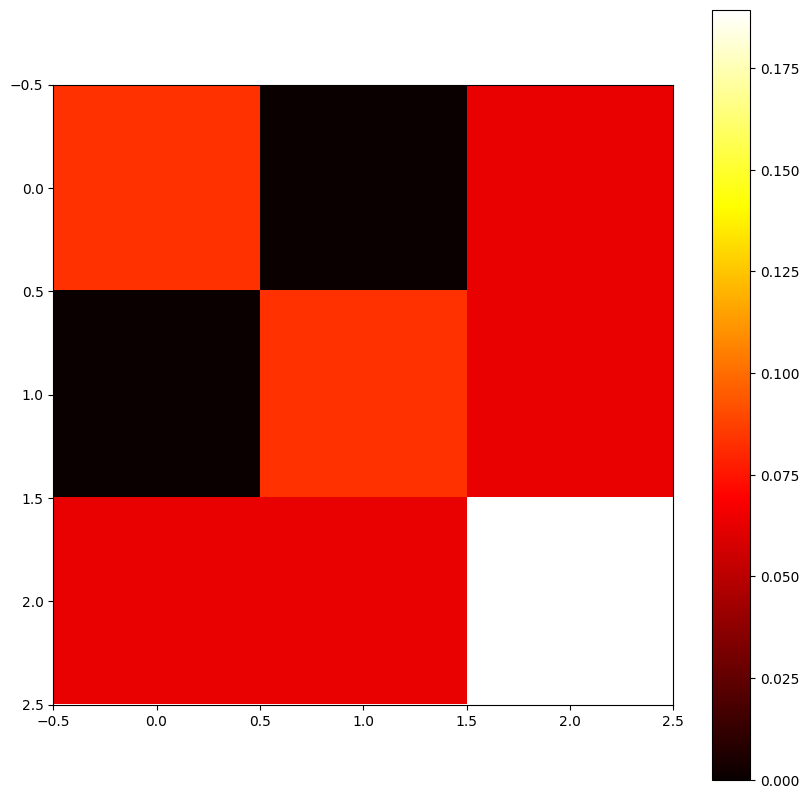

In [5]:
mostrar_matriz_heat_map(np.cov(matriz_combinada.T))

In [6]:
# obtener theta

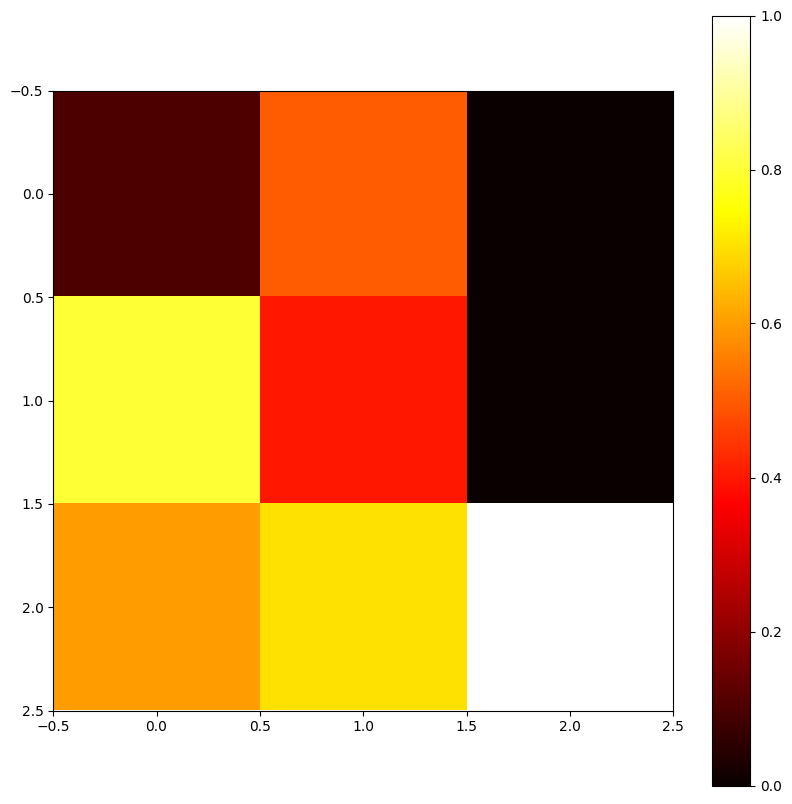

In [7]:
# exp 3
# 2 filas con valor 0
# 1 fila con valor 1
np.random.seed(42)  # for reproducibility
zeros = matriz_combinada[matriz_combinada[:, 2] == 0]
ones = matriz_combinada[matriz_combinada[:, 2] == 1]
selected_zeros = zeros[np.random.choice(zeros.shape[0], 2, replace=False)]
selected_ones = ones[np.random.choice(ones.shape[0], 1, replace=False)]
m_exp3 = np.vstack((selected_zeros, selected_ones))
mostrar_matriz_heat_map(m_exp3)

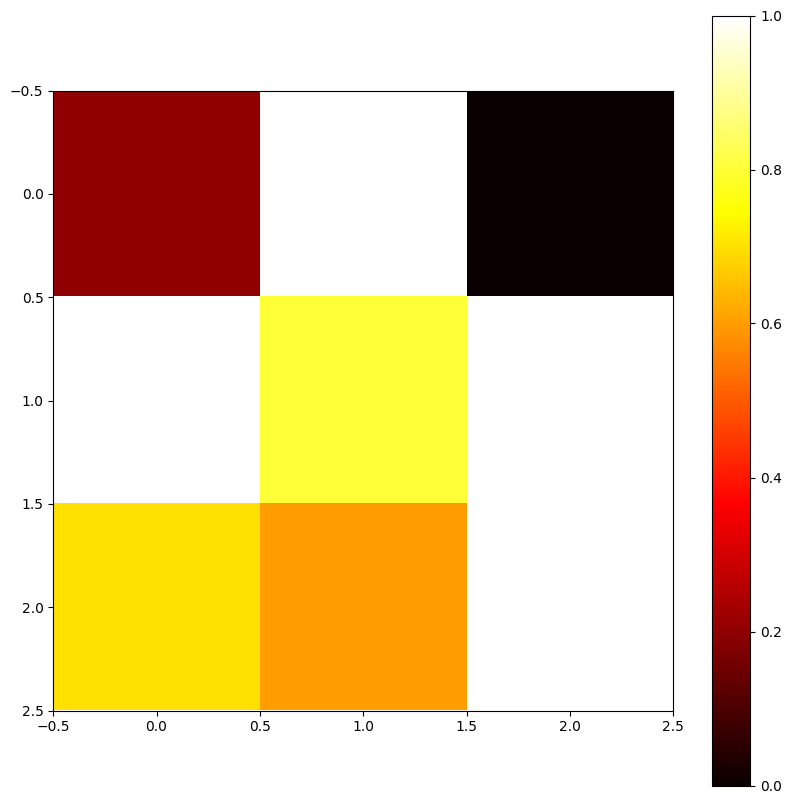

In [8]:
# exp 4
# 1 filas con valor 0
# 2 fila con valor 1
zeros = matriz_combinada[matriz_combinada[:, 2] == 0]
ones = matriz_combinada[matriz_combinada[:, 2] == 1]
selected_zeros = zeros[np.random.choice(zeros.shape[0], 1, replace=False)]
selected_ones = ones[np.random.choice(ones.shape[0], 2, replace=False)]
m_exp3 = np.vstack((selected_zeros, selected_ones))
mostrar_matriz_heat_map(m_exp3)

In [9]:
m_exp5 = np.array([
   # x1, x2, y1, y2
    [1,1,0,0],
    [1,0,1,1],
    [1,1,0,0],
    [0,0,0,1],
    [0,1,1,1],
])

# Estimadores

In [10]:
def minimos_cuadrados(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, Y):
    H = sigmoid(X @ theta)
    epsilon = 1e-5  # Para evitar log(0)
    cost = -(1/m) * np.sum(Y * np.log(H + epsilon) + (1 - Y) * np.log(1 - H + epsilon))
    return cost

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, Y, alpha, num_iters):
    theta = np.zeros((X.shape[1], Y.shape[1]))
    m = X.shape[0]
    i = 0
    while i < num_iters:
        H = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (H - Y)
        theta -= alpha * gradient
        i += 1
    return theta


def sigmoid_derivative(a):
    return a * (1 - a)

def backpropagation(X, Y, hidden_size=5, learning_rate=0.1, num_epochs=1000):
    """
    Entrena una red neuronal de una capa oculta usando backpropagation.
    
    Parámetros:
    - X: Matriz de entrada con forma (m, n_features)
    - Y: Matriz de salida con forma (m, n_outputs)
    - hidden_size: Número de neuronas en la capa oculta
    - learning_rate: Tasa de aprendizaje
    - num_epochs: Número de épocas de entrenamiento
    
    Retorna:
    - W1, b1: Pesos y bias de la capa oculta
    - W2, b2: Pesos y bias de la capa de salida
    """
    m = X.shape[0]
    input_size = X.shape[1]
    output_size = Y.shape[1]
    
    # Inicialización de pesos
    np.random.seed(0)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    
    # Entrenamiento con backpropagation
    for epoch in range(num_epochs):
        # Propagación hacia adelante
        Z1 = X @ W1 + b1  # (m x hidden_size)
        A1 = sigmoid(Z1)    # (m x hidden_size)
        Z2 = A1 @ W2 + b2   # (m x output_size)
        A2 = sigmoid(Z2)    # (m x output_size)
        
        # Cálculo del costo (opcional, para monitorear)
        # epsilon = 1e-5
        # cost = -(1/m) * np.sum(Y * np.log(A2 + epsilon) + (1 - Y) * np.log(1 - A2 + epsilon))
        
        # Propagación hacia atrás
        dZ2 = A2 - Y  # (m x output_size)
        dW2 = (1/m) * A1.T @ dZ2  # (hidden_size x output_size)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # (1 x output_size)
        
        dA1 = dZ2 @ W2.T  # (m x hidden_size)
        dZ1 = dA1 * sigmoid_derivative(A1)  # (m x hidden_size)
        dW1 = (1/m) * X.T @ dZ1  # (input_size x hidden_size)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # (1 x hidden_size)
        
        # Actualización de pesos
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    
    return W1, b1, W2, b2
def predict(X, W1, b1, W2, b2):
    Z1 = X @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)
    return A2

### Exp 1

In [11]:
X = [
    [1,0,0],
    [0,1,0],
    [0,0,0],
    [1,1,1],
]
X = np.array(X)
y = X[:,2]
X = X[:, :2]
t = minimos_cuadrados(X, y)
print(f'Minimimos cuadrados: {t}')
alpha = 0.1
num_iters = 20
t = gradient_descent(X, y.reshape(-1, 1), alpha, num_iters)
print(f'Gradiente descendente: \n{t}')
# Parámetros de entrenamiento
hidden_size = 5       # Número de neuronas en la capa oculta
learning_rate = 0.1   # Tasa de aprendizaje
num_epochs = 1000     # Número de épocas

# Entrenamiento
W1, b1, W2, b2 = backpropagation(X, y.reshape(-1, 1), hidden_size, learning_rate, num_epochs)
print(f'W1:\n {W1}')
print(f'b1:\n {b1}')
print(f'W2:\n {W2}')
print(f'b2: \n {b2}')

Y_pred = predict(X, W1, b1, W2, b2)

Y_pred_classes = (Y_pred >= 0.5).astype(int)
print(f'Predicciones: {Y_pred_classes}')

Minimimos cuadrados: [0.33333333 0.33333333]
Gradiente descendente: 
[[0.]
 [0.]]
W1:
 [[ 0.79626667  1.84395297  1.58923852  2.35423062  2.133399  ]
 [-2.05853721  2.15591521  0.27111964 -0.17280241  0.33678575]]
b1:
 [[ 0.01516499 -2.74357958 -0.69139674 -0.23573418 -0.91916308]]
W2:
 [[-1.58283147]
 [ 3.67135453]
 [ 0.9548112 ]
 [ 0.71183739]
 [ 1.27536874]]
b2: 
 [[-3.93012816]]
Predicciones: [[0]
 [0]
 [0]
 [1]]


### Exp 2

In [12]:
entrada_1 = np.arange(0.1, 1+0.1, 0.1)
entrada_2 = np.arange(0.1, 1+0.1, 0.1)
combinaciones = np.array(np.meshgrid(entrada_1, entrada_2)).T.reshape(-1,2)
X = combinaciones
y = salida.reshape(-1, 1)
theta = minimos_cuadrados(X, y)
print(f'Minimimos cuadrados: {theta}')
alpha = 0.1
num_iters = 20
theta = gradient_descent(X, y, alpha, num_iters)
print(f'Gradiente descendente: \n{theta}')

# Parámetros de entrenamiento
hidden_size = 5       # Número de neuronas en la capa oculta
learning_rate = 0.1   # Tasa de aprendizaje
num_epochs = 1000     # Número de épocas

# Entrenamiento
W1, b1, W2, b2 = backpropagation(X, y, hidden_size, learning_rate, num_epochs)
print(f'W1:\n {W1}')
print(f'b1:\n {b1}')
print(f'W2:\n {W2}')
print(f'b2: \n {b2}')


Minimimos cuadrados: [[0.29090909]
 [0.29090909]]
Gradiente descendente: 
[[-0.12788691]
 [-0.12788691]]
W1:
 [[ 1.25865864  1.31069585  1.2985872   2.21130738  1.89791002]
 [-1.39612824  1.71378279  0.094457   -0.05120804  0.3805339 ]]
b1:
 [[ 0.11979527 -1.60547805 -0.37213374  0.29405539 -0.29819086]]
W2:
 [[-0.64668186]
 [ 2.35930471]
 [ 0.5991657 ]
 [ 0.02804254]
 [ 0.60149372]]
b2: 
 [[-2.74087098]]


### Exp 3

In [13]:
np.random.seed(42)
entrada_1 = np.arange(0.1, 1+0.1, 0.1)
entrada_2 = np.arange(0.1, 1+0.1, 0.1)
combinaciones = np.array(np.meshgrid(entrada_1, entrada_2)).T.reshape(-1,2)
salida = np.where((combinaciones[:, 0] >= 0.6) & (combinaciones[:, 1] >= 0.6), 1, 0)
matriz_combinada = np.hstack((combinaciones, salida.reshape(-1, 1)))

zeros = matriz_combinada[matriz_combinada[:, 2] == 0]
ones = matriz_combinada[matriz_combinada[:, 2] == 1]
selected_zeros = zeros[np.random.choice(zeros.shape[0], 2, replace=False)]
selected_ones = ones[np.random.choice(ones.shape[0], 1, replace=False)]
m_exp3 = np.vstack((selected_zeros, selected_ones))
y = m_exp3[:, 2]
X = m_exp3[:, :2]
t = minimos_cuadrados(X, y)
print(f'Minimimos cuadrados: {t}')
alpha = 0.1
num_iters = 20
t = gradient_descent(X, y.reshape(-1, 1), alpha, num_iters)
print(f'Gradiente descendente: \n{t}')

# Parámetros de entrenamiento
hidden_size = 5       # Número de neuronas en la capa oculta
learning_rate = 0.1   # Tasa de aprendizaje
num_epochs = 1000     # Número de épocas

# Entrenamiento
W1, b1, W2, b2 = backpropagation(X, y.reshape(-1, 1), hidden_size, learning_rate, num_epochs)
print(f'W1:\n {W1}')
print(f'b1:\n {b1}')
print(f'W2:\n {W2}')
print(f'b2: \n {b2}')


Minimimos cuadrados: [-0.04563005  0.81783082]
Gradiente descendente: 
[[-0.08882557]
 [-0.05658346]]
W1:
 [[ 1.24773192  0.83391406  1.12515721  2.19340989  2.01058472]
 [-1.8741079   2.06802676  0.09771054 -0.12602574  0.52909254]]
b1:
 [[ 0.01339291 -1.32475636 -0.18559395  0.0691238  -0.27555569]]
W2:
 [[-1.46654251]
 [ 2.30800098]
 [ 0.28011446]
 [ 0.21039284]
 [ 0.73187211]]
b2: 
 [[-2.15153849]]


## Exp 4

In [14]:
np.random.seed(42)
entrada_1 = np.arange(0.1, 1+0.1, 0.1)
entrada_2 = np.arange(0.1, 1+0.1, 0.1)
combinaciones = np.array(np.meshgrid(entrada_1, entrada_2)).T.reshape(-1,2)
salida = np.where((combinaciones[:, 0] >= 0.6) & (combinaciones[:, 1] >= 0.6), 1, 0)
matriz_combinada = np.hstack((combinaciones, salida.reshape(-1, 1)))

zeros = matriz_combinada[matriz_combinada[:, 2] == 0]
ones = matriz_combinada[matriz_combinada[:, 2] == 1]
selected_zeros = zeros[np.random.choice(zeros.shape[0], 1, replace=False)]
selected_ones = ones[np.random.choice(ones.shape[0], 2, replace=False)]
m_exp3 = np.vstack((selected_zeros, selected_ones))
y = m_exp3[:, 2]
X = m_exp3[:, :2]

t = minimos_cuadrados(X, y)
print(f'Minimimos cuadrados: {t}')
alpha = 0.1
num_iters = 20
t = gradient_descent(X, y.reshape(-1, 1), alpha, num_iters)
print(f'Gradiente descendente: \n{t}')

# Parámetros de entrenamiento
hidden_size = 5       # Número de neuronas en la capa oculta
learning_rate = 0.1   # Tasa de aprendizaje
num_epochs = 1000     # Número de épocas

# Entrenamiento
W1, b1, W2, b2 = backpropagation(X, y.reshape(-1, 1), hidden_size, learning_rate, num_epochs)
print(f'W1:\n {W1}')
print(f'b1:\n {b1}')
print(f'W2:\n {W2}')
print(f'b2: \n {b2}')

Minimimos cuadrados: [ 2.14684757 -0.34317638]
Gradiente descendente: 
[[0.3180936]
 [0.324066 ]]
W1:
 [[ 2.17012638  2.54705076  2.15276326  3.13380169  3.07037022]
 [-0.8149081   1.50728217  0.24167119  0.01912632  0.56573957]]
b1:
 [[-0.26636946 -1.98151264 -0.93559022 -1.11351094 -1.49554687]]
W2:
 [[0.55525104]
 [2.8608123 ]
 [1.39386164]
 [1.90319755]
 [2.32627604]]
b2: 
 [[-3.81145471]]


In [15]:
m_exp5 = np.array([
   # x1, x2, y1, y2
    [1,1,0,0],
    [1,0,1,1],
    [1,1,0,0],
    [0,0,0,1],
    [0,1,1,1],
])
X = m_exp5[:, :2]
y = m_exp5[:, 2:]

t = minimos_cuadrados(X, y)
print(f'Minimimos cuadrados: \n{t}')

alpha = 0.1
num_iters = 20
t = gradient_descent(X, y, alpha, num_iters)
print(f'Gradiente descendente: \n{t}')

# Parámetros de entrenamiento
hidden_size = 5       # Número de neuronas en la capa oculta
learning_rate = 0.1   # Tasa de aprendizaje
num_epochs = 1000     # Número de ép

# Entrenamiento
W1, b1, W2, b2 = backpropagation(X, y, hidden_size, learning_rate, num_epochs)
print(f'W1:\n {W1}')
print(f'b1:\n {b1}')
print(f'W2:\n {W2}')
print(f'b2: \n {b2}')


Minimimos cuadrados: 
[[0.2 0.2]
 [0.2 0.2]]
Gradiente descendente: 
[[-0.15906183 -0.15906183]
 [-0.15906183 -0.15906183]]
W1:
 [[ 0.48792886  0.44946997  0.16426963  2.86301452  2.83484534]
 [-3.58027846  0.94435638 -0.76661966  0.14945492  1.3516781 ]]
b1:
 [[ 0.81519694 -0.06508566  0.19573864 -1.26609184 -3.05276254]]
W2:
 [[ 0.78031688  4.18803939]
 [ 0.21074765 -0.21073149]
 [-0.03482614  0.96539635]
 [ 0.22126614 -2.41274713]
 [-1.5671224  -3.74566247]]
b2: 
 [[-0.28938003  2.2436045 ]]
